# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'axes.axisbelow': True,
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'font.size':15,
    'savefig.directory':'./Images'
})

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

Show a picture of both your estimations of $I$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

### Soluzione

Vogliamo calcolare il valore di 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

per farlo usiamo l'integrazione Monte Carlo. Si ottiene che il valore di $I = \int_{a}^b f(x) dx = ... = (b-a)\langle f \rangle _{[a,b]}$, 

dove $$\langle f \rangle _{[a,b]} = \frac{1}{N} \sum_{i=1}^N f(x_i)$$ con $x_i$ numeri casuali.


##### 1. Sampling uniforme

Calcoliamo l'integrale dato campionando i punti con una distribuzione uniforme. 
Estraiamo casualmente un numero nell'intervallo $[0,1)$ calcoliamo il valore della funzione in quel punto e facciamo la media dei valori ottenuti tramite il metodo del data blocking. Il valor medio, moltiplicato per l'intervallo che però in questo caso è 1, ci da il risultato dell'integrale $I$. 

##### 2. Imporance Sampling

Qusto tipo di approccio consiste nel riscrivere l'integranda $f(x)$ come il prodotto di due funzioni $p(x)g(x)$ di cui $p(x)$ è la distribuzione di probabilità che assomiglia all'integranda, nel nostro caso usiamo uno sviluppo di Taylor valutato in $x=1$ dell'integranda. Quindi:
$$p(x) = 2(1-x)$$
che viene campionato con il metodo della funzione comulativa, quindi si ottiene che
$$ x = 1 - \sqrt{1-y} $$ 
con $y$ distribuito uniformemente e

$$ g(x) = \frac{ \frac{\pi}{2} cos(\frac{\pi}{2} x) }{2(1-x)}$$

Grafichiamo l'andamento di $I$ in funzione del numero di blocchi sia per il sampling uniforme sia per l'importance sampling. Osserviamo che il metodo dell'importance sampling genera risultati più accurati riducendo l'errore.

//sampling unoforme: 

for(int j = 0; j<N; j++){
        sum = 0;
        for(int i=0; i <L; i++){
            x[i] = rnd.Rannyu();
            y[i] = fcos(M_PI/2., M_PI/2., x[i]);
            sum += y[i];
        }     
        ave[j] = sum/L;
        av2[j] = pow(ave[j],2);      
    }


//importance sampling:
double Random :: Imp_sampling() {
   double y = Rannyu();
   return 1 - sqrt(1-y);
}

//nel main:
for(int j = 0; j<N; j++){
        sum_is = 0;
        for(int i=0; i <L; i++){
            x_is[i] = rnd.Imp_sampling();
            y_is[i] = gcos(M_PI/2., M_PI/2., x_is[i]);
            sum_is += y_is[i];
    
        }     
        ave_is[j] = sum_is/L;
        av2_is[j] = pow(ave_is[j],2);      
    }

Parametri data blocking:
- $M = 10^5$
- $N = 10^2$

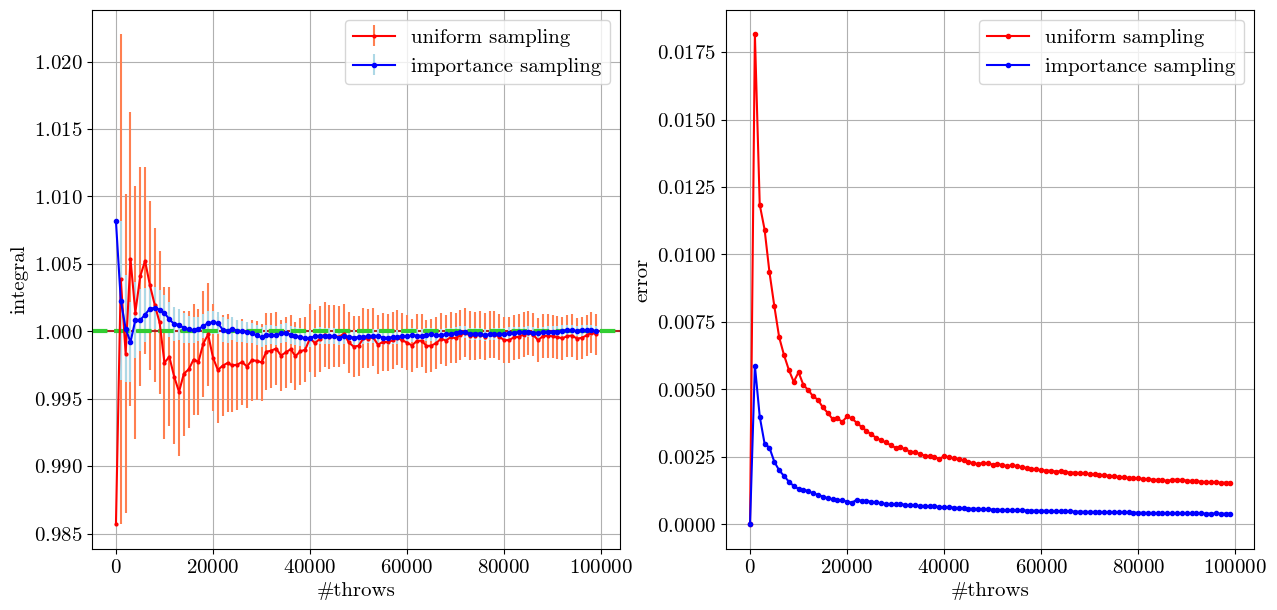

In [3]:
# mean value of integral as a function of the number of throws
integral1 = np.loadtxt("es2_1/integral1.dat")
x = integral1[:,0]
y = integral1[:,1]
err = integral1[:,2]

plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.errorbar(x,y,err, ecolor= 'coral', marker = 'o', markersize = 2, color='red', label = 'uniform sampling')
plt.axhline(y=1, color='firebrick', linestyle='-')
plt.xlabel('#throws')
plt.ylabel('integral')
plt.grid(True)

integral2 = np.loadtxt("es2_1/integral2.dat")
x_is = integral2[:,0]
y_is = integral2[:,1]
err_is = integral2[:,2]


plt.subplot(1,2,1)
plt.errorbar(x_is,y_is,err_is, ecolor= 'lightblue', marker = 'o', markersize = 3, color="blue", label = 'importance sampling')
plt.axhline(y=1, color="limegreen", linestyle='--', linewidth=3)
plt.xlabel('#throws')
plt.ylabel('integral')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(x, err, color='red', marker = 'o', markersize = 3, label='uniform sampling')
plt.xlabel('#throws')
plt.ylabel('error')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x_is, err_is, marker = 'o', markersize = 3, color='blue', label = 'importance sampling')
plt.xlabel('#throws')
plt.ylabel('error')
plt.grid(True)
plt.legend()

plt.show()

### Exercise 02.2
- 3D Random Walks (RW) on a cubic lattice and in the continuum: Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

### Soluzione
##### 1. RW discreto
Simuliamo un random walk discreto su un reticolo di passo a = 1. Ad ogni step il walker può fare un passo avanti o indietro in una delle tre direzioni spaziali (x, y, z). Per far ciò ad ogni passo estraiamo casualmente un numero casuale da 1 a 6, lo trasformiamo in intero e associamo ad ogni numero una mossa (+1 o -1 in una delle tre direzioni).


``` c++
void RW3D_discrete(Posizione &p, double r, int a) {
    
    if(r==0) {  p.setX(p.getX()+a);  };
    if(r==1) {  p.setX(p.getX()-a);  };
    if(r==2) {  p.setY(p.getY()+a);  };
    if(r==3) {  p.setY(p.getY()-a);  };
    if(r==4) {  p.setZ(p.getZ()+a);  };
    if(r==5) {  p.setZ(p.getZ()-a);  };
};


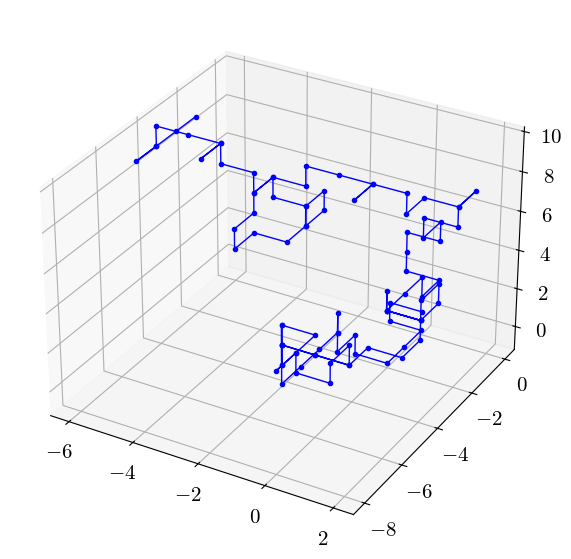

In [4]:
discr = np.loadtxt("es2_2/config_discreto.dat")
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
x = discr[:,0]
y = discr[:,1]
z = discr[:,2]
ax.plot3D(x,y,z,"-o",color='b',linewidth=1,markersize=3)
plt.show()

[0.99770631]


Text(0, 0.5, '$\\sqrt{<r^2>}$ - $\\sqrt{N}$')

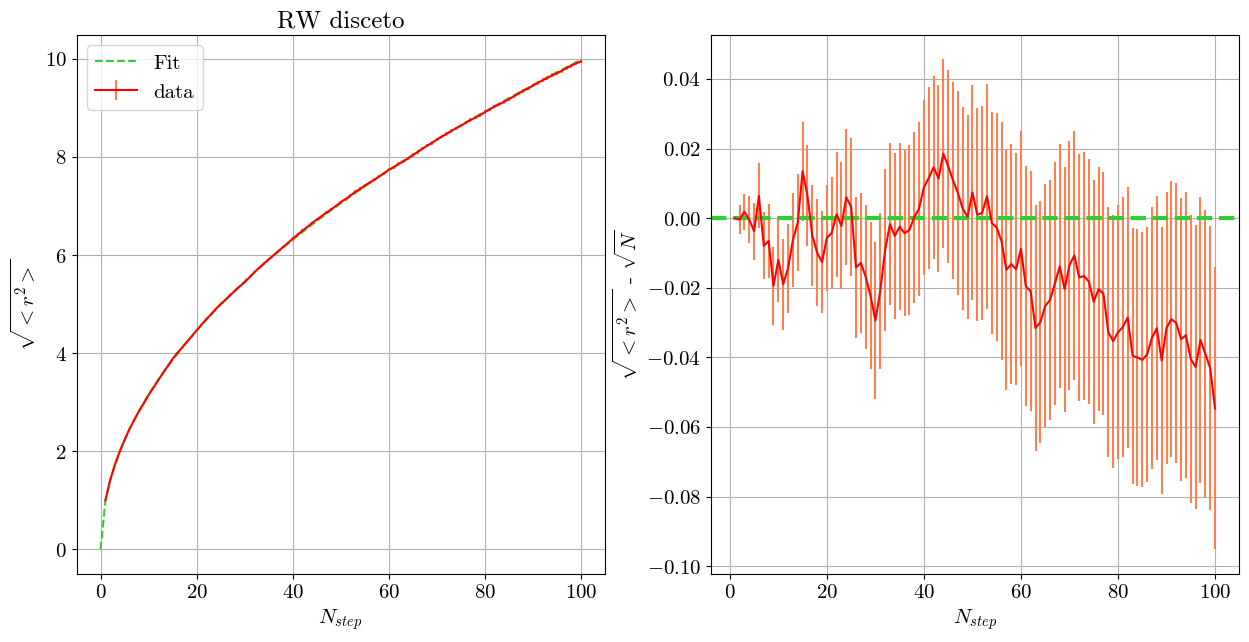

In [11]:
sqrtr2medio = np.loadtxt("es2_2/sqrt_r2_medio.dat")
x = np.arange(1, 101) # N_step
y = sqrtr2medio[:,0]
err = sqrtr2medio[:,1]

plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.errorbar(x,y,err, ecolor= 'coral' ,color='red', label = 'data')
#plt.plot(x, err)
# Definiamo la funzione di fit (radice: y = a*sqrt(x))
def radice(x, a):
    return a * np.sqrt( x)

# Fit della curva
popt, pcov = curve_fit(radice, x, y )

# Estraiamo i parametri ottimizzati
a_fit = popt
print(popt)

# Creiamo i dati della curva fittata
x_fit = np.linspace(0, 100, 100)
y_fit = radice(x_fit, *popt)
plt.plot(x_fit, y_fit, '--', label = 'Fit', color="limegreen")

plt.title("RW disceto")
plt.legend()
plt.xlabel('$N_{step}$')
plt.ylabel('$\sqrt{<r^2>}$')
plt.grid(True)

# differenza tra valore calcolato e valore aspettato (sqrt(N))
plt.figure(1)
plt.subplot(1,2,2)
plt.errorbar(x,(y-np.sqrt(x)),err, ecolor= 'coral' ,color='red', label = 'data')
plt.axhline(y=0, color='limegreen', linestyle='--', linewidth =3)
plt.grid()
plt.xlabel('$N_{step}$')
plt.ylabel('$\sqrt{<r^2>}$ - $\sqrt{N}$')



##### 2. RW continuo

Simuliamo un random walk continuo estraendo l'angolo $\theta$ e l'angolo $\phi$ delle coordinate sferiche.
Se estraiamo casualmente $\theta$ e $\phi$ in modo uniforme otteniamo che la distribuzione dei punti sulla sfera non è uniforme perchè si estraggono più punti vicino ai poli essendo che il raggio delle sezioni della sfera vicino ai poli è più piccolo e quindi i punti estratti con angolo $\phi$ pari a 0 sono più concentrati. Il motivo di questo è dovuto alla presenza dello jacobiano nel cambio di coordiante. (vedi https://mathworld.wolfram.com/SpherePointPicking.html) 

Controllando la normalizzazione della probabilità di estrazione dei punti otteniamo che dobbiamo imporre $$\int_0^{2\pi} \int_0^\pi \frac{1}{4\pi}\sin(\theta) d\phi d\theta = 1$$ da cui si ha $$\int_0^\pi \frac{1}{2}\sin(\theta) d\theta = 1$$ quindi usiamo il metodo dell'inversa della comulativa per campionare una probabilità di $ p(\theta) = \frac{1}{2}\sin(\theta)$. 
La comulativa è $F(\theta) = \frac{1}{2} (1- \cos(\theta)) = y$, da cui si ha che $\theta = \arccos(1-2y)$.

``` c++
void RW3D_continuum(Posizione &p, double r_theta, double r_fi, int a){
    double theta;
    double fi;
    fi = r_fi * 2 * M_PI;    // Angolo phi tra 0 e 2π
    theta = acos(1 - 2*r_theta);  // Angolo theta tra 0 e π
    
    p.sferichex(p.getX(), a, theta, fi);
    p.sferichey(p.getY(), a, theta, fi);
    p.sferichez(p.getZ(), a, theta, fi);
};

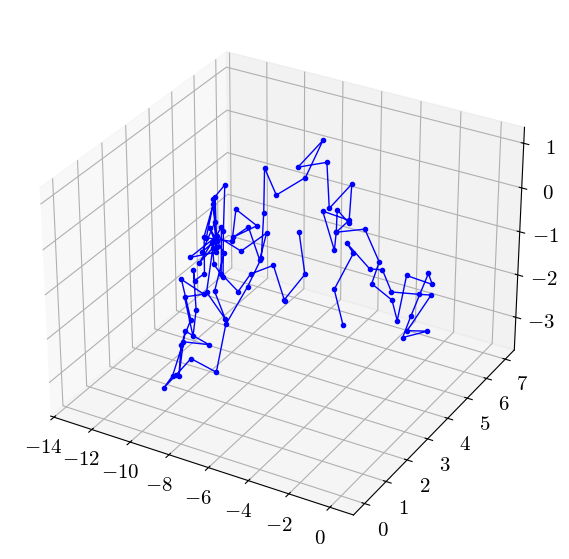

In [6]:
discr = np.loadtxt("es2_2/config_continuo.dat")
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
x = discr[:,0]
y = discr[:,1]
z = discr[:,2]
ax.plot3D(x,y,z,"-o",color='b',linewidth=1,markersize=3)
plt.show()

In entrambi i casi (discrto e continuo) vogliamo ora calcolare il valore:  $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$. Per farlo applichiamo il data blocking. Per ogni valore del numero di passi $(N_step)$ calcoliamo un valor medio di $|\vec{r}_N|^2 $ con la media a blocchi: creiamo $M$ repliche del RW e dividiamo le repliche in $N$ blocchi. Per ogni valore di $N_{step}$ salviamo l'ultimo valore ottenuto nella media a blocchi e ne facciamo la radice quadrata

<span style="color:red">Non sono convita che sia giusto come ho fatto. la radice bisogna farla dopo aver fatto il sum prog perche il valore di cui voglio calcolare la media è l'argomento della radice. Però cosi devo ripensare come calcoalre l'errore</span>

[0.99863808]


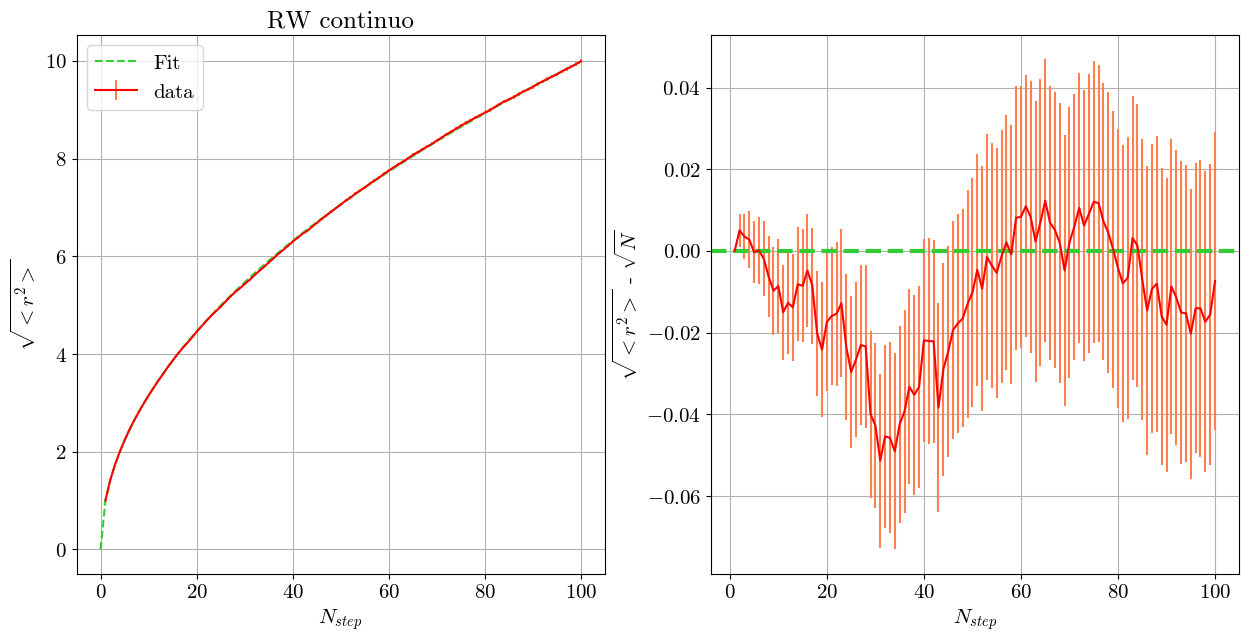

In [10]:
sqrtr2medio_c = np.loadtxt("es2_2/sqrt_r2_medio_continuum.dat")
x_c = np.arange(1, 101)
y_c = sqrtr2medio_c[:,0]
err_c = sqrtr2medio_c[:,1]

plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.errorbar(x_c,y_c,err_c, ecolor= 'coral' ,color='red', label = 'data')

# Definiamo la funzione di fit (radice: y = a*sqrt(x))
def radice(x, a):
    return a * np.sqrt(x)

# Fit della curva
popt_c, pcov_c = curve_fit(radice, x_c, y_c )

# Estraiamo i parametri ottimizzati
a_fit = popt_c
print(popt_c)

# Creiamo i dati della curva fittata
x_fit = np.linspace(0, 100, 100)
y_fit = radice(x_fit, *popt_c)
plt.plot(x_fit, y_fit, '--', label = 'Fit', color="limegreen")
plt.grid(True)

plt.title("RW continuo")
plt.legend()
plt.xlabel('$N_{step}$')
plt.ylabel('$\sqrt{<r^2>}$')


# differenza tra valore calcolato e valore aspettato (sqrt(N))
plt.figure(1)
plt.subplot(1,2,2)
plt.errorbar(x_c,(y_c-np.sqrt(x_c)),  err_c, ecolor= 'coral', color='red', label = 'data')
plt.axhline(y=0, color='limegreen', linestyle='--', linewidth = 3)
plt.xlabel('$N_{step}$')
plt.ylabel('$\sqrt{<r^2>}$ - $\sqrt{N}$')

plt.grid(True)


Ci aspettiamo che l'andamento di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ all'aumentare del numero di passi segua una legge $\propto \sqrt{N_{step}}$, infatti il Random walk è un esempio di processo di Markov in cui la distribuzione di probabilità della distanza tra punto iniziale e finale della catena segue l'equazione di diffusione: 
$$\frac{\partial p(x,t)}{\partial t} = D \frac{\partial^2 p(x,t)}{\partial x^2} $$

da cui si ottiene che $ \langle x^2(t) \rangle = 2Dt $. Nel caso del RW con passo $a$ si ha che  $ \langle r^2(t) \rangle = a N_{step}^2 $, quindi ci fittando il grafico con una funzione del tipo $f(N) = k \sqrt{N}$ ci aspettiamo di ottenere $k = 1$, che è esattamente quello che otteniamo sia nel caso continuo sia nel caso discreto. 

